In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import os,sys
sys.path.append(os.path.realpath('FGW distance on graph/lib'))
from graph import Graph
from ot_distances import Fused_Gromov_Wasserstein_distance
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from synthetic_graphs import *
from solver import *

### Generate and test our graphs

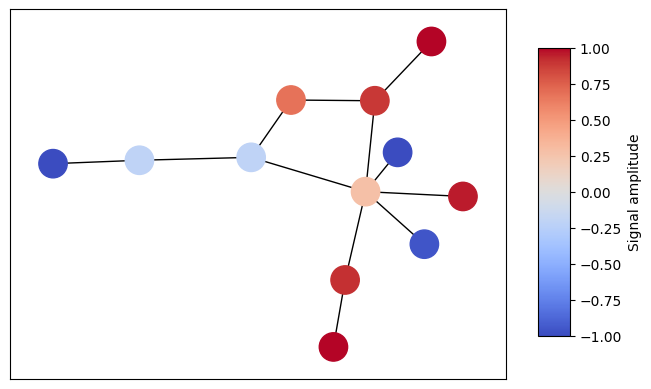

Mean and std:  (0.19384473015096462, 0.7963560441499522)
Laplacian quadratic form:  6.089896117758063


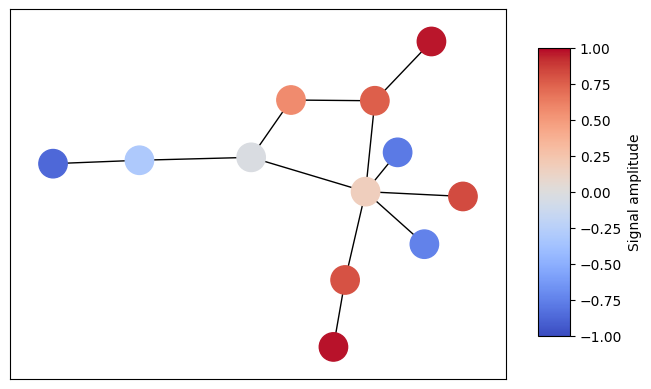

Mean and std:  (0.1938447301509645, 0.6890873899596663)
Laplacian quadratic form:  3.816769971877941


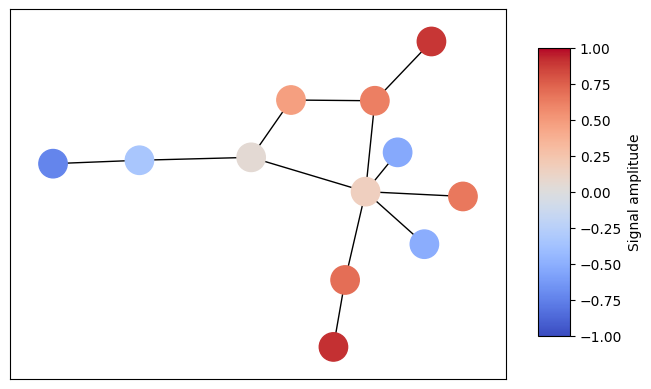

Mean and std:  (0.1938447301509644, 0.5711245314918423)
Laplacian quadratic form:  2.3121920721280818


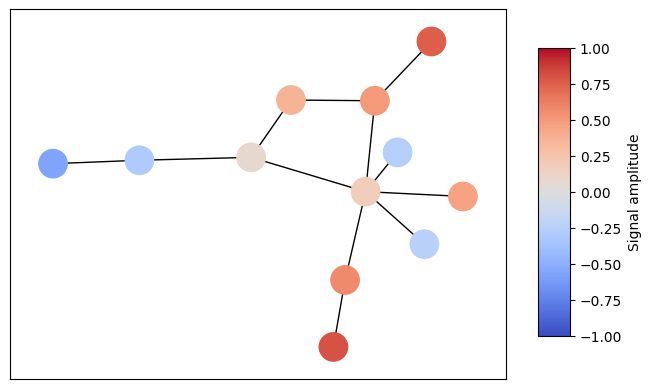

Mean and std:  (0.1938447301509643, 0.43422478583710755)
Laplacian quadratic form:  1.1540542565137089


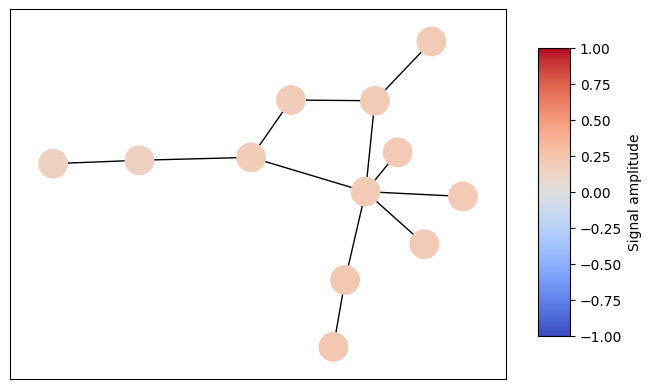

Mean and std:  (0.19384473015096404, 0.02487325091176012)
Laplacian quadratic form:  0.0020512087391707555


In [32]:
# Input parameters
num_nodes = 12
num_edges = 12
value_range = (-1, 1)
diffusion_timesteps = [0, 2, 5, 10, 100]

# Create the graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])

# Perform diffusion and plot the graph at each timestep
G_list = [G0]
for t in diffusion_timesteps:
    G = diffusion(G0,  diffusion_steps = t)
    G_list.append(G)
    plot_graph(G, labels=False, value_range=value_range)
    print("Mean and std: ", graph_stats(G))
    print("Laplacian quadratic form: ", signal_smoothness_on_graph(G))


In [33]:
#Sample the signal from the graph
samples = sample_signal_from_graph(G0, num_samples = 20, sampling_noise_std = 0.2)
print("Samples shape: ", samples.shape)
print("Samples: ", samples)

Samples shape:  (20, 12)
Samples:  [[ 0.45803992 -1.00676242  0.79485166 -1.06589822  0.85736577  0.84530829
  -0.04224258 -0.22926504  0.00598514 -0.86680957  0.8220344   0.87571027]
 [ 0.8069219  -0.95038916  1.20216233 -1.04770905  0.78623779  0.88129349
  -0.0503236  -0.27093389 -0.01088394 -0.96273637  0.82207829  1.07136082]
 [ 0.5341142  -0.90143011  1.05986807 -0.98524667  1.08133128  0.90355172
   0.4289939  -0.53344117 -0.13136572 -1.33063924  0.78814175  0.91248399]
 [ 0.57563993 -1.07547099  1.3030296  -1.04382912  0.77266721  1.04454438
   0.06374238 -0.73211993 -0.34029828 -0.93676657  0.75439282  0.83636329]
 [ 0.72437075 -0.90639913  1.06612469 -1.15063769  0.85993868  0.71878456
   0.55538675 -0.2010732  -0.47304595 -1.11179359  0.75102497  1.08647729]
 [ 0.72602807 -1.16848487  0.83761831 -0.91048969  0.9421184   1.11331755
   0.53533445  0.05281354 -0.1686721  -0.92409698  0.58286727  0.85633671]
 [ 0.5614876  -1.25243164  1.10536309 -0.79439496  0.84220047  0.999762

### Test of the initial solver

In [34]:
#Initialize graph

solvers.options['show_progress'] = True
syn = synthetic_data_gen(10)
num_nodes = syn.num_vertices

np.random.seed(3)
graph_signals_er, graph_signals_ba, graph_signals_rnd = syn.get_graph_signals()


<class 'networkx.utils.decorators.argmap'> compilation 28:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


     pcost       dcost       gap    pres   dres
 0:  3.2429e+00 -2.4863e+00  9e+01  9e+00  5e+00
 1:  4.5682e+00 -1.0198e+00  6e+00  1e-15  1e-15
 2:  4.3586e+00  3.0328e+00  1e+00  3e-16  5e-16
 3:  4.0726e+00  3.7971e+00  3e-01  2e-16  3e-16
 4:  3.9628e+00  3.9383e+00  2e-02  2e-16  3e-16
 5:  3.9493e+00  3.9484e+00  9e-04  2e-16  3e-16
 6:  3.9487e+00  3.9487e+00  2e-05  2e-16  3e-16
 7:  3.9487e+00  3.9487e+00  3e-07  3e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2274e+00 -2.5089e+00  9e+01  9e+00  5e+00
 1:  4.5523e+00 -1.0414e+00  6e+00  1e-15  1e-15
 2:  4.3423e+00  3.0119e+00  1e+00  3e-16  6e-16
 3:  4.0551e+00  3.7791e+00  3e-01  2e-16  3e-16
 4:  3.9448e+00  3.9203e+00  2e-02  2e-16  4e-16
 5:  3.9313e+00  3.9304e+00  9e-04  2e-16  3e-16
 6:  3.9307e+00  3.9307e+00  2e-05  2e-16  3e-16
 7:  3.9307e+00  3.9307e+00  2e-07  3e-16  3e-16
Optimal solution found.


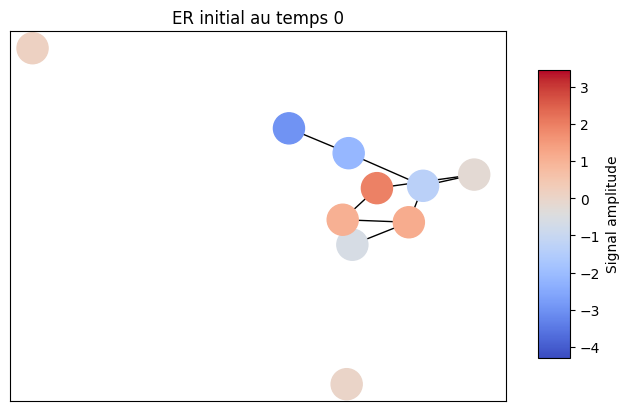

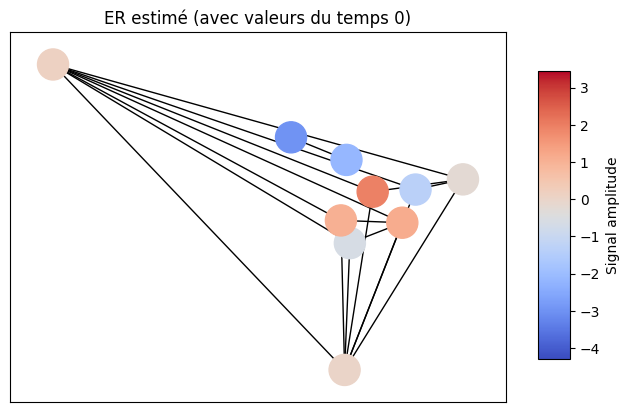

In [35]:
L_er, Y_er = gl_sig_model(graph_signals_er, 1000, syn.alpha_er, syn.beta_er)

L_er_gt = nx.laplacian_matrix(syn.er_graph)

gt_graph = syn.er_graph
est_graph = create_graph_from_laplacian(L_er)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0:  3.0146e+00 -2.8708e+00  8e+01  7e+00  6e+00
 1:  3.9031e+00 -1.5573e+00  5e+00  1e-15  1e-15
 2:  3.6593e+00  2.3721e+00  1e+00  3e-16  8e-16
 3:  3.1405e+00  2.7128e+00  4e-01  2e-16  4e-16
 4:  2.9943e+00  2.9514e+00  4e-02  4e-16  4e-16
 5:  2.9696e+00  2.9678e+00  2e-03  3e-16  3e-16
 6:  2.9684e+00  2.9683e+00  9e-05  3e-16  4e-16
 7:  2.9683e+00  2.9683e+00  1e-05  2e-16  3e-16
 8:  2.9683e+00  2.9683e+00  9e-07  3e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9995e+00 -2.8889e+00  8e+01  7e+00  6e+00
 1:  3.8903e+00 -1.5741e+00  5e+00  1e-15  1e-15
 2:  3.6457e+00  2.3550e+00  1e+00  7e-16  8e-16
 3:  3.1251e+00  2.6968e+00  4e-01  2e-16  4e-16
 4:  2.9783e+00  2.9352e+00  4e-02  2e-16  3e-16
 5:  2.9534e+00  2.9516e+00  2e-03  3e-16  3e-16
 6:  2.9522e+00  2.9521e+00  9e-05  4e-16  3e-16
 7:  2.9522e+00  2.9521e+00  1e-05  2e-16  3e-16
 8:  2.9521e+00  2.9521e+00  9e-07  2e-16  3e-1

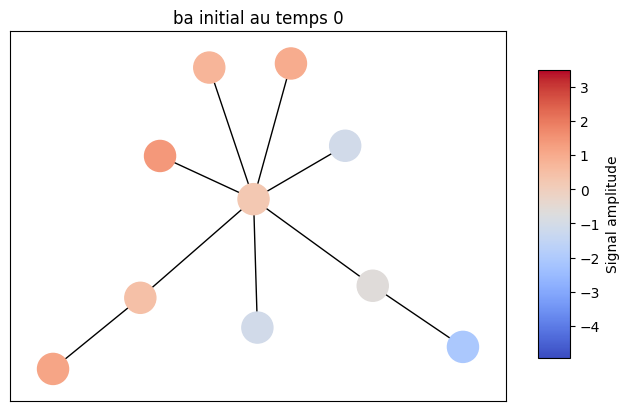

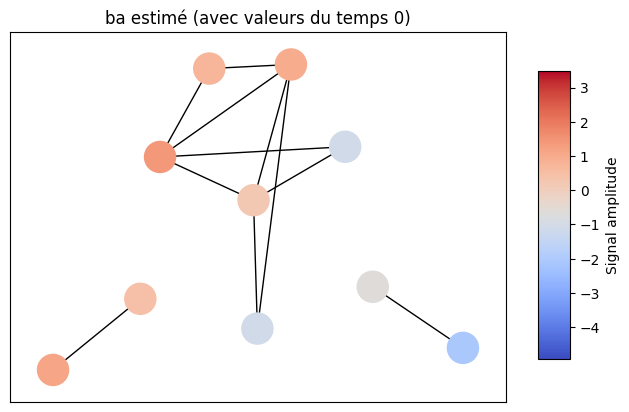

In [36]:
L_ba, Y_ba = gl_sig_model(graph_signals_ba, 1000, syn.alpha_ba, syn.beta_ba)

L_ba_gt = nx.laplacian_matrix(syn.ba_graph)

gt_graph = syn.ba_graph
est_graph = create_graph_from_laplacian(L_ba)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0:  2.0533e+01  1.3946e+01  9e+01  8e+00  2e+00
 1:  2.0989e+01  1.5783e+01  1e+01  5e-01  1e-01
 2:  2.1269e+01  2.0260e+01  1e+00  1e-02  2e-03
 3:  2.1073e+01  2.0987e+01  9e-02  3e-04  7e-05
 4:  2.1041e+01  2.1035e+01  6e-03  1e-05  2e-06
 5:  2.1039e+01  2.1038e+01  4e-04  1e-07  3e-08
 6:  2.1038e+01  2.1038e+01  2e-05  1e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0265e+01  1.3663e+01  9e+01  8e+00  2e+00
 1:  2.0720e+01  1.5505e+01  1e+01  5e-01  1e-01
 2:  2.0991e+01  1.9987e+01  1e+00  1e-02  2e-03
 3:  2.0797e+01  2.0711e+01  9e-02  4e-04  8e-05
 4:  2.0766e+01  2.0760e+01  6e-03  1e-05  3e-06
 5:  2.0763e+01  2.0762e+01  4e-04  2e-07  4e-08
 6:  2.0763e+01  2.0763e+01  2e-05  1e-09  3e-10
 7:  2.0763e+01  2.0763e+01  3e-07  1e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0265e+01  1.3662e+01  9e+01  8e+00  2e+00
 1:  2.0719e+01  1.5504e

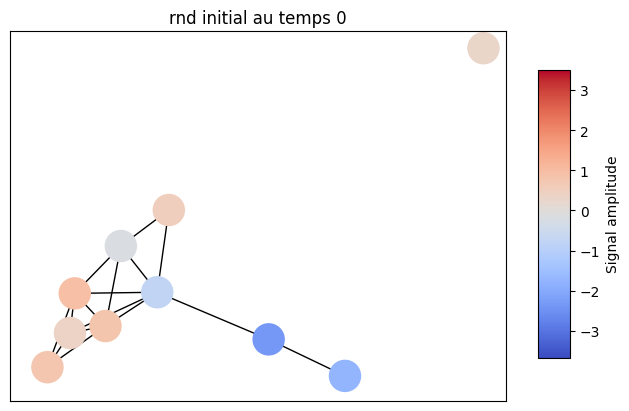

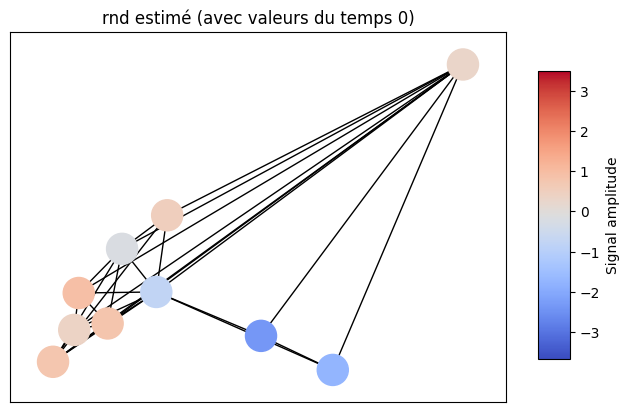

In [37]:
L_rnd, Y_rnd = gl_sig_model(graph_signals_rnd, 1000, syn.alpha_rnd, syn.beta_rnd)

L_rnd_gt = nx.laplacian_matrix(syn.random_graph)

gt_graph = syn.random_graph
est_graph = create_graph_from_laplacian(L_rnd)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd estimé (avec valeurs du temps 0)")

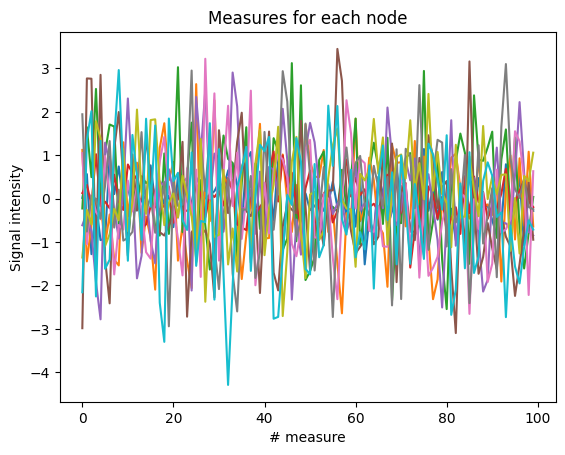

In [38]:
# Plot the 100 measures on each node
plt.figure()
for node in range(graph_signals_er.shape[1]) :
    plt.plot(graph_signals_er[:, node], label = f"Signal du noeud {node}")
# plt.legend()
plt.title("Measures for each node")
plt.xlabel("# measure")
plt.ylabel("Signal intensity")
plt.show()

### Test solver with our graphs

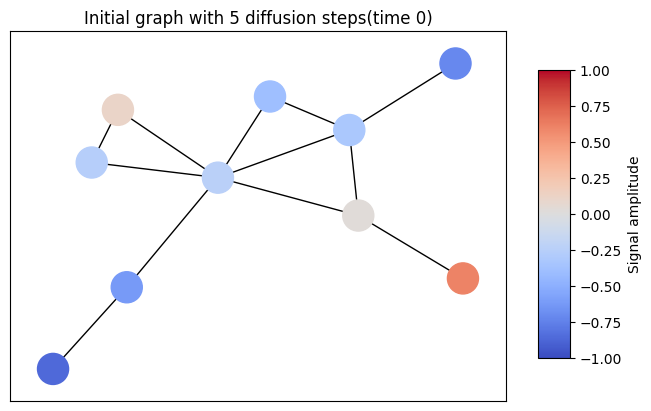

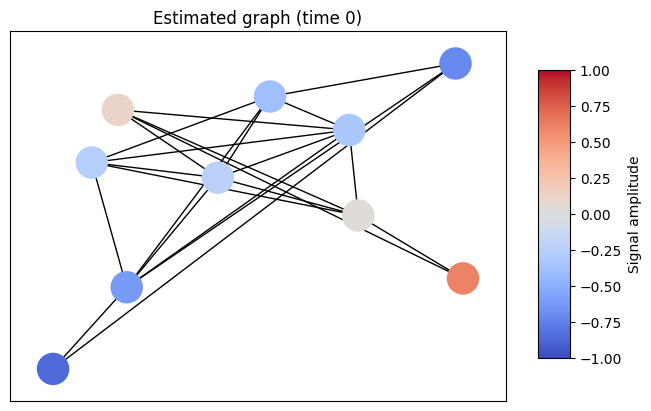

In [39]:
# Graph generation
# Input parameters
num_nodes = 10
num_edges = 12
value_range = (-1, 1)
diffusion_time = 5
# Create the initial graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
# Perform diffusion
G = diffusion(G0,  diffusion_steps = diffusion_time)

# Graph signal generation
# Signal parameters
num_samples = 20
noise_std = 0.2
# Generation
graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

# Solver
# Solver parameters
max_iter = 1000
alpha = 1e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)
# Solving
L_est, Y_est = gl_sig_model(graph_signal, max_iter, alpha, beta)

# Generate graph from Laplacian
G_est = create_graph_from_laplacian(L_est, node_start = 1)
for node in G_est.nodes():
    G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
    G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
for edge in G_est.edges():
    G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

plot_graph(G, value_range=value_range, labels=False, title=f"Initial graph with {diffusion_time} diffusion steps(time 0)")
plot_graph(G_est, value_range=value_range, labels=False, title="Estimated graph (time 0)")

### Tuning hyperparameters

Principe : On choisit alpha, beta et un t_diff. On génére n_stat graphes initiaux, on les fait diffuser et on crée un sample pour chacune des diffusions.
On utilise le solver et on fait la moyenne sur les n_stat graphe des distances.

In [40]:
# REMARQUE : Cette cellule prend un peu moins de 5min pour n_stat de 10 chez moi

n_stat = 10
g_init = []
sample_init = []
for _ in range(n_stat) :
    # Graph generation
    # Input parameters
    num_nodes = 10
    num_edges = 12
    value_range = (-1, 1)
    diffusion_time = 10
    # Create the initial graph
    G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
    # Perform diffusion
    G = diffusion(G0,  diffusion_steps = diffusion_time)

    # Graph signal generation
    # Signal parameters
    num_samples = 20
    noise_std = 0.2
    # Generation
    graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

    g_init.append(G)
    sample_init.append(graph_signal)

alphas = np.linspace(1e-6, 1e-3, 30)
betas = np.linspace(0.5e-4, 1e-2, 30)
G_est_ab = [[0] * len(betas) for _ in range(len(alphas))]
distances = np.zeros((len(alphas), len(betas)))
distance_min = 100
param_min = []
for i, alpha in enumerate(alphas) :
    for j, beta in enumerate(betas) :
        # Solver parameters
        max_iter = 1000
        solvers.options['show_progress'] = False
        np.random.seed(3)
        dist_k = []
        for k in range(n_stat) :
            # Solving
            L_est, Y_est = gl_sig_model(sample_init[k], max_iter, alpha, beta)

            # Generate graph from Laplacian
            G_est = create_graph_from_laplacian(L_est, node_start = 1)
            # for node in G_est.nodes():
            #     G_est.nodes[node]['value'] = g_init[k].nodes[node]['value'] #add signal
            #     G_est.nodes[node]['pos'] = g_init[k].nodes[node]['pos'] #keep same position as initial
            # for edge in G_est.edges():
            #     G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)
            # G_est_ab[i][j] = G_est
            dist_k.append(Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path').graph_d(Graph(g_init[k]), Graph(G_est)))
        
        distances[i, j] = sum(dist_k) / len(dist_k)
        if distances[i,j] < distance_min :
            distance_min = distances[i,j]
            param_min = [(i, alpha), (j, beta)]


C:\Users\Adrien\Documents\Work\MVA\Geometrical Data Analysis\Learn-Graph-Laplacian\code\FGW distance on graph\lib\graph.py:142: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(self.nx_graph)


[(27, 0.0009311034482758621), (2, 0.0007362068965517242)]


<Figure size 640x480 with 0 Axes>

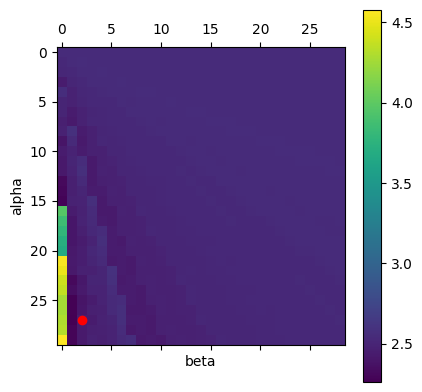

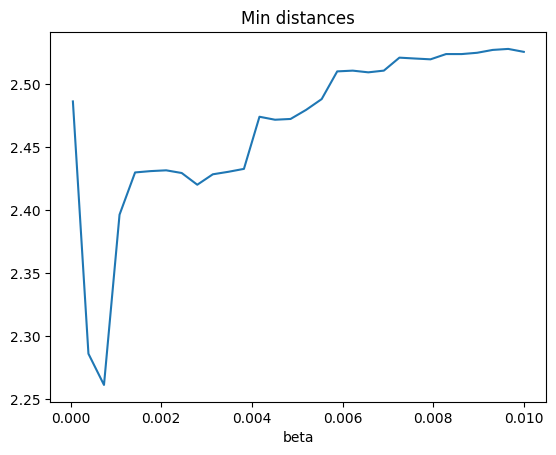

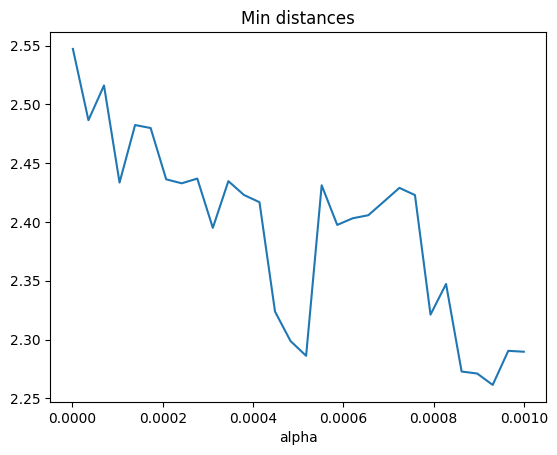

array([[  2.547159  ,   2.54840995,   2.54852904,   2.54858345,
          2.54859625,   2.54862197,   2.54862072,   2.54863127,
          2.54863226,   2.54863439,   2.54863778,   2.54864071,
          2.54864254,   2.54864431,   2.54864604,   2.54864741,
          2.54864894,   2.54864953,   2.54865091,   2.54865138,
          2.54865361,   2.54865268,   2.54865366,   2.54865412,
          2.54865459,   2.54865504,   2.54865594,   2.54865577,
          2.54865627,   2.54865658],
       [  2.48652036,   2.53220346,   2.54874634,   2.55108261,
          2.54809752,   2.54714152,   2.54725082,   2.54732147,
          2.54745429,   2.5475445 ,   2.54789067,   2.54774281,
          2.54781771,   2.54789021,   2.54795344,   2.54798804,
          2.54802959,   2.54806889,   2.54809908,   2.54823806,
          2.54823205,   2.54818404,   2.54821958,   2.548226  ,
          2.54832862,   2.54825336,   2.54835295,   2.54832967,
          2.54830457,   2.54838533],
       [  3.96701466,   2.5160

In [41]:
print(param_min)
plt.figure()
plt.matshow(distances[:, 1:])
plt.plot(param_min[1][0], param_min[0][0], 'ro')
plt.colorbar()
plt.xlabel('beta')
plt.ylabel('alpha')
plt.show()
plt.figure()
plt.plot(betas, np.min(distances, 0))
plt.title("Min distances")
plt.xlabel("beta")
plt.show()
plt.figure()
plt.plot(alphas, np.min(distances, 1))
plt.title("Min distances")
plt.xlabel("alpha")
plt.show()
distances

Best values are depending on the initial graph, but the variations are globally always the same.
The best value intervals in term of *Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path')* seem to be :
$$\alpha^* \in [6e-4, 1e-3]$$
$$\beta^* \in [1e-3, 2e-3]$$


### Distance wrt smoothness experiment

In [42]:
max_iter = 1000
alpha = 1e-3 #5e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)

nb_graphs = 10  # Number of graphs to generate and test on
num_nodes = 8  # Number of nodes in each graph
num_edges = 8  # Number of edges in each graph
node_value_range = [-1, 1]  # Range of values that each node can take
edge_weight_range = [1, 1]  # Range of weights that each edge can take

diffusion_steps = np.logspace(0, 1.5, 25)  # Number of diffusion steps to test on

# Build the ground truth and reconstructed graphs for each diffusion step
gt_graphs = [[] for _ in range(len(diffusion_steps))]
reconstructed_graphs = [[] for _ in range(len(diffusion_steps))] # for eah diffusion time, the estimated graph for different initial graphs
for i in range(nb_graphs):
    # Create a graph
    G0 = create_graph(num_nodes, num_edges, node_value_range, edge_weight_range = edge_weight_range)

    # Perform diffusion and plot the graph at each timestep
    for j, t in enumerate(diffusion_steps):
        G = diffusion(G0,  diffusion_steps = t)
        gt_graphs[j].append(G)

        #Sample the signal from the graph
        samples = sample_signal_from_graph(G, num_samples = 20, sampling_noise_std = 0.2)
        
        #Reconstruct the graph from the samples
        L_est, Y_est = gl_sig_model(samples, max_iter, alpha, beta)

        # Generate graph from Laplacian
        G_est = create_graph_from_laplacian(L_est, node_start = 1)
        for node in G_est.nodes():
            G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
            G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
        for edge in G_est.edges():
            G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

        reconstructed_graphs[j].append(G_est)


In [43]:
#Compute the FGW distances between the ground truth and reconstructed graphs using Fused Gromov-Wasserstein distance
distances_fgw = np.zeros((len(diffusion_steps), nb_graphs))

for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        distances_fgw[i, j] = Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[i][j]))


# Compute the smoothness of the signal on each graph
smoothnesses = np.zeros((len(diffusion_steps), nb_graphs))
for i, graphs in enumerate(gt_graphs):
    for j, graph in enumerate(graphs):
        smoothnesses[i, j] = signal_smoothness_on_graph(graph)



Text(0.5, 1.0, 'Smoothness of the signal on a graph\nw.r.t. the diffusion steps')

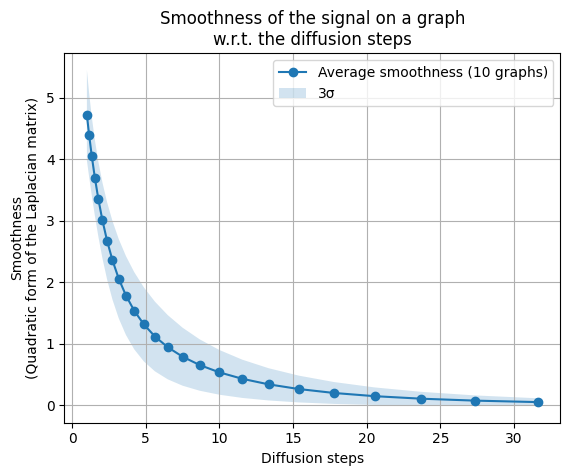

In [44]:
#Plot the average and std for the quadratic form of the Laplacian matrix of each graph per diffusion step as a continuous line and a shaded area respectively
plt.plot(diffusion_steps, np.mean(smoothnesses, axis=1), marker='o', label=f'Average smoothness ({nb_graphs} graphs)')
plt.fill_between(diffusion_steps, np.mean(smoothnesses, axis=1) - 1.5 * np.std(smoothnesses, axis=1), np.mean(smoothnesses, axis=1) + 1.5 * np.std(smoothnesses, axis=1), alpha=0.2, label='3σ')
#Add a legend to explain the shaded area
plt.legend()
plt.xlabel("Diffusion steps")
plt.ylabel("Smoothness\n(Quadratic form of the Laplacian matrix)")
#Add a grid to the plot
plt.grid()
plt.title("Smoothness of the signal on a graph\nw.r.t. the diffusion steps")



Text(0.5, 1.0, 'FGW Distance between the ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph')

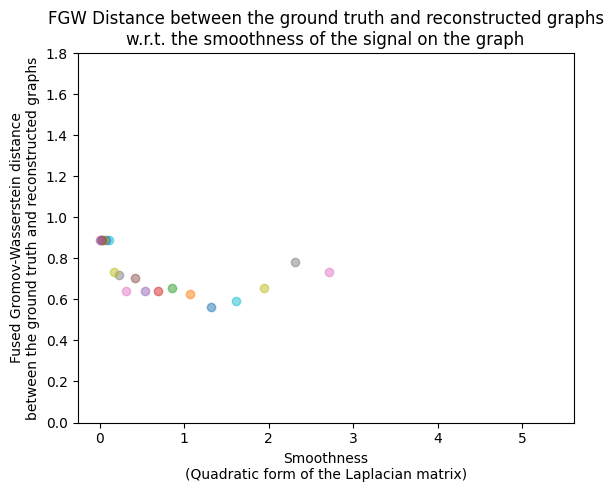

In [69]:
# Scatter plot the FGW distance between the ground truth and reconstructed graphs per smoothness for each pair of graphs
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        plt.scatter(smoothnesses[i, j], distances_fgw[i, j], alpha=0.5)
plt.ylim(0, 1.8)
plt.xlabel("Smoothness\n(Quadratic form of the Laplacian matrix)")
plt.ylabel("Fused Gromov-Wasserstein distance\nbetween the ground truth and reconstructed graphs")
plt.title("FGW Distance between the ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph")

In [46]:
#Compute the GED distances between the ground truth and reconstructed graphs using Fused Gromov-Wasserstein distance
distances_ged = np.zeros((len(diffusion_steps), nb_graphs))

for i in tqdm(range(len(diffusion_steps))):
    for j in tqdm(range(nb_graphs)):
        #Compute the graph edit distance by matching the nodes based on their position
        distances_ged[i, j] = nx.graph_edit_distance(gt_graphs[i][j], reconstructed_graphs[i][j])


100%|██████████| 25/25 [06:09<00:00, 14.77s/it]


Text(0.5, 1.0, 'GED Distance between the ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph')

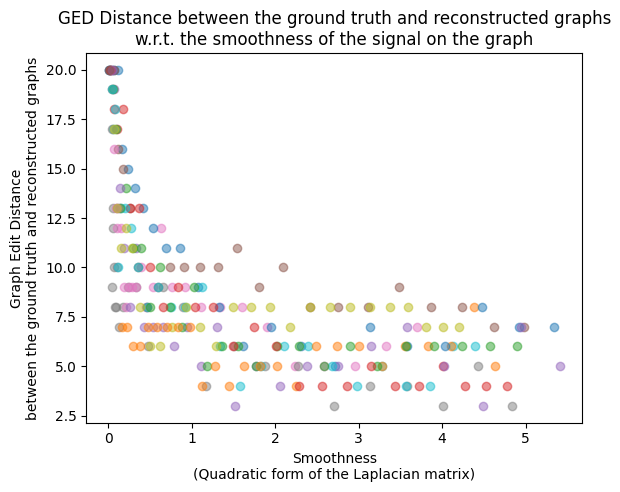

In [65]:
# Scatter plot the GED distance between the ground truth and reconstructed graphs per smoothness for each pair of graphs
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        plt.scatter(smoothnesses[i, j], distances_ged[i, j], alpha=0.5)
        
plt.xlabel("Smoothness\n(Quadratic form of the Laplacian matrix)")
plt.ylabel("Graph Edit Distance\nbetween the ground truth and reconstructed graphs")
plt.title("GED Distance between the ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph")

Smoothness : 2.0235837919057342, distance 2.4378480719406292


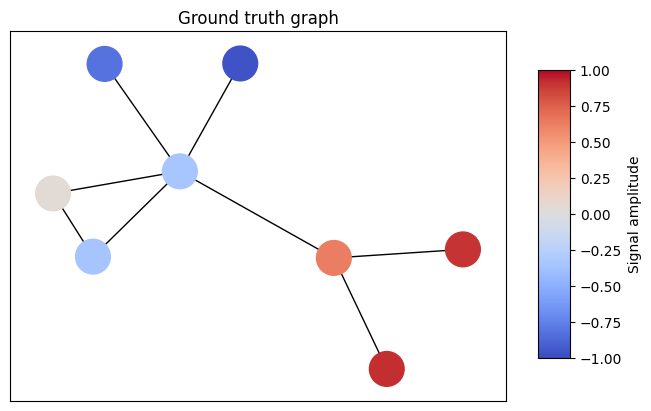

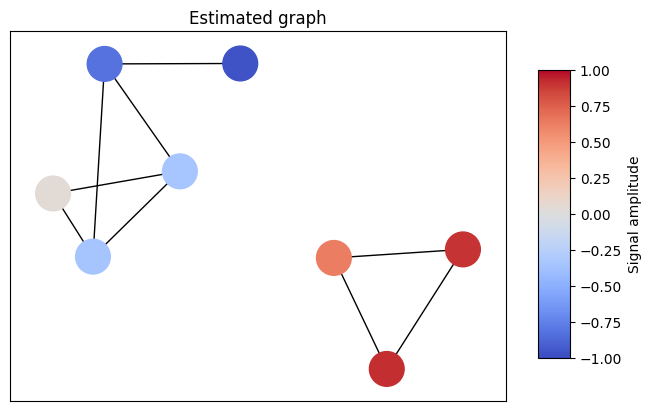

In [48]:
# Vizualize any graph in the matrix :
i=10
j=1
print(f"Smoothness : {smoothnesses[i][j]}, distance {distances[i][j]}")
plot_graph(gt_graphs[i][j], value_range=value_range, labels=False, title=f"Ground truth graph")
plot_graph(reconstructed_graphs[i][j], value_range=value_range, labels=False, title="Estimated graph")

In [49]:
# Estimate how much the reconstructed graphs differ to one another with the different diffusion steps
# The FGW is not the most appropriate distance to do this because it takes into account the node values
# Instead, we use the graph edit distance as it only takes into account the graph structure

# Go through all the reconstructions of each of the N graphs and compute the graph edit distance between them
graph_edit_distances = np.zeros(nb_graphs, len(diffusion_steps), len(diffusion_steps))

for i in range(nb_graphs):
    for j in range(len(diffusion_steps)):
        for k in range(len(diffusion_steps)):
            graph_edit_distances[i, j, k] = nx.graph_edit_distance(reconstructed_graphs[j][i], reconstructed_graphs[k][i])

TypeError: Cannot interpret '25' as a data type

### Graph reconstruction using a time-evolving signal

In [ ]:
max_iter = 1000
alpha = 1e-3 #5e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)

nb_graphs = 10  # Number of graphs to generate and test on
num_nodes = 8  # Number of nodes in each graph
num_edges = 8  # Number of edges in each graph
node_value_range = [-1, 1]  # Range of values that each node can take
edge_weight_range = [1, 1]  # Range of weights that each edge can take

diffusion_steps = np.logspace(0, 1.5, 25)  # Number of diffusion steps to test on

# Build the ground truth and reconstructed graphs for each diffusion step
gt_graphs = [[] for _ in range(len(diffusion_steps))]
reconstructed_graphs = [] #for each graph the goal is to reconstruct a graph using various diffusion timesteps

for i in range(nb_graphs):
    # Create a graph
    G0 = create_graph(num_nodes, num_edges, node_value_range, edge_weight_range = edge_weight_range)
    samples = []

    # Perform diffusion and plot the graph at each timestep
    for j, t in enumerate(diffusion_steps):
        G = diffusion(G0,  diffusion_steps = t)
        gt_graphs[j].append(G)

        #Sample the signal from the graph
        samples_t = sample_signal_from_graph(G, num_samples = 20, sampling_noise_std = 0.2)
        
        #Concatenate the samples_t to the samples
        if j == 0 :
            samples = samples_t
        else :
            samples = np.concatenate((samples, samples_t), axis=0)
        
    #Reconstruct the graph from the samples
    L_est, Y_est = gl_sig_model(samples, max_iter, alpha, beta)

    # Generate graph from Laplacian
    G_est = create_graph_from_laplacian(L_est, node_start = 1)
    for node in G_est.nodes():
        G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
        G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
    for edge in G_est.edges():
        G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

    reconstructed_graphs.append(G_est)


In [ ]:
#For each reconstructed graph, compute the distance between the ground truth and reconstructed graphs using Fused Gromov-Wasserstein distance
#Note that this might not be the most appropriate distance to use as it takes into account the node values and we are mostly interested in the graph structure
#Unfortuntaely, the graph edit distance would be very expensive to compute here as we have a lot of graphs to compare

distances = np.zeros((len(diffusion_steps), nb_graphs))
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        distances[i, j] = Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[j]))

#Compute the average and std for the distance between the ground truth and reconstructed graphs per graph
avg_distances = np.mean(distances, axis=0)
std_distances = np.std(distances, axis=0)

print("Average distance between the ground truth and reconstructed graphs per graph: ", avg_distances)
print("Std for the distance between the ground truth and reconstructed graphs per graph: ", std_distances)

C:\Users\Adrien\Documents\Work\MVA\Geometrical Data Analysis\Learn-Graph-Laplacian\code\FGW distance on graph\lib\graph.py:142: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(self.nx_graph)


Average distance between the ground truth and reconstructed graphs per graph:  [225.1175    20.3625   247.038125  23.2525   243.218125 108.251875
  87.541875 368.161875  24.469375  23.5775  ]
Std for the distance between the ground truth and reconstructed graphs per graph:  [0.03674235 0.09185587 0.04286607 0.01224745 0.07960842 0.06736097
 0.0244949  0.04898979 0.07348469 0.07348469]


The cell above shows that the reconstructed graph is quite "far away" to the original graph whatever the situation. How much of that is due to the node values is unclear...